In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

## DNN

In [ ]:
# 1. 데이터 셋 생성
width = 28; height=28;
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32')/255.0
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 생성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학슴과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val),callbacks=[early_stopping])

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
# 모델을 사용하여 예측이 틀린 데이터만 출력
yhat = model.predict(x_test).argmax(axis=1)
yhat

In [ ]:
y= y_test.argmax(axis=1)
y

In [ ]:
plt_row=20
plt_col=15
#plt.figure(figsize=(12,10))
plt.rcParams['figure.figsize']=(20,20)
plt.rc("font", family="Malgun Gothic")
#plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig, axarr = plt.subplots(plt_row, plt_col)
i=0 # yhat과 y를 액세스할 index
cnt=0 # 출력횟수
while (cnt<plt_row*plt_col)&(i<len(y)):
    if yhat[i] == y[i]:
        i+=1
        continue
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(x_test[i].reshape(width,height))
    sub_plot.axis('off')
    sub_plot.set_title("실제 : " + str(y[i]) + ", 예측 :" + str(yhat[i]))
    i+=1
    cnt+=1

## CNN

In [3]:
# 1. 데이터 셋 생성
width = 28; height=28;
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32')/255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32')/255.0
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학슴과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val),callbacks=[early_stopping])

Epoch 1/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1573 - accuracy: 0.9516 - val_loss: 0.0626 - val_accuracy: 0.9802
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0414 - val_accuracy: 0.9873
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0434 - val_accuracy: 0.9863
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0326 - val_accuracy: 0.9906
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0381 - val_accuracy: 0.9899
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0355 - val_ac

In [4]:
score = model.evaluate(x_test, y_test, batch_size=50)

200/200 [==============================] - 1s 4ms/step - loss: 0.0491 - accuracy: 0.9897


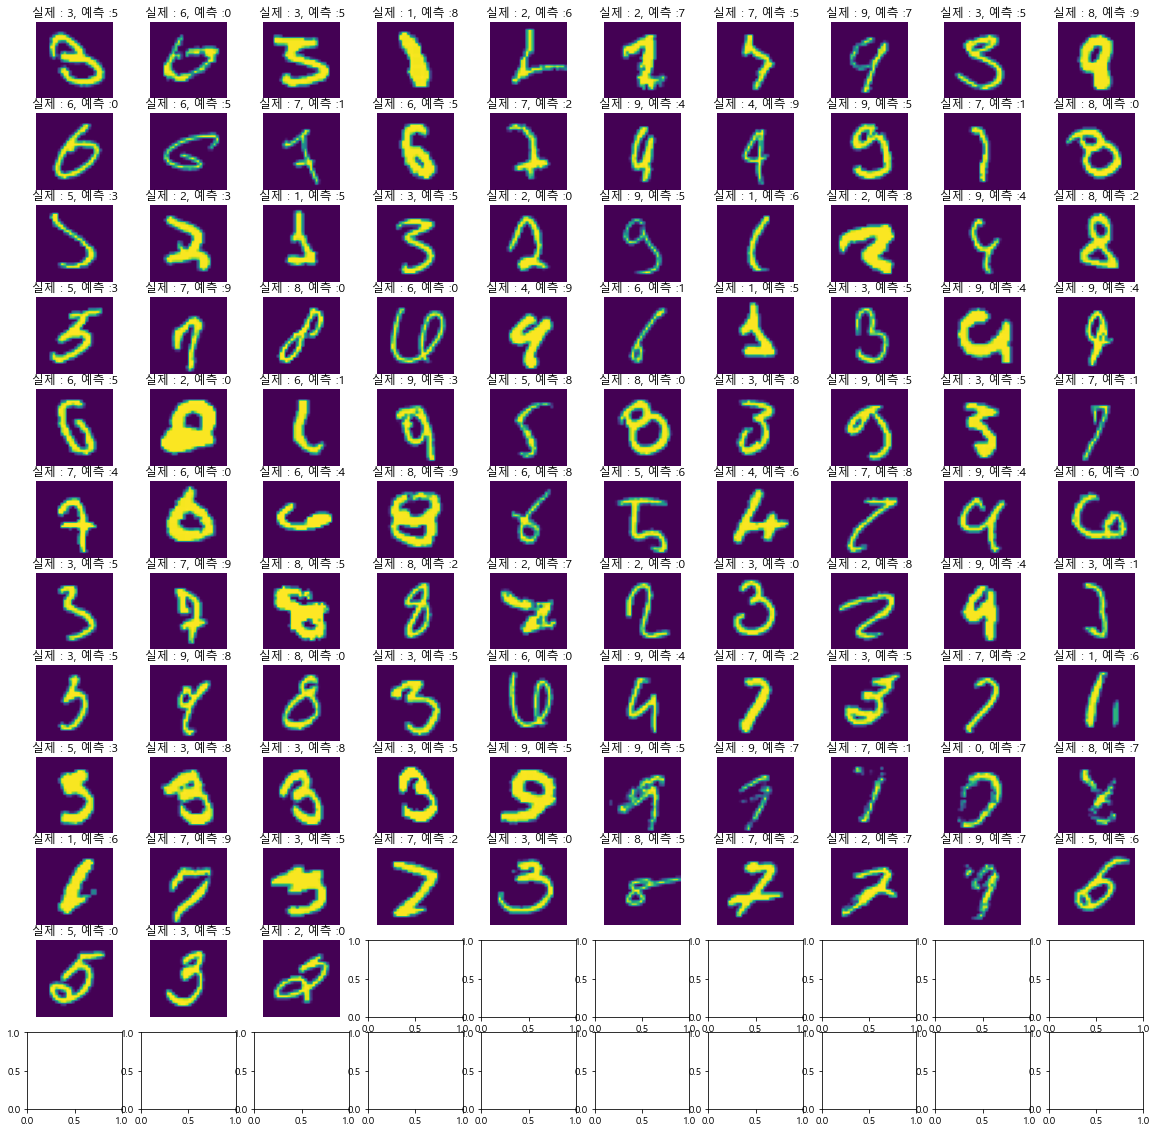

In [7]:
yhat = model.predict(x_test).argmax(axis=1)
y= y_test.argmax(axis=1)
plt_row=12
plt_col=10
#plt.figure(figsize=(12,10))
plt.rcParams['figure.figsize']=(20,20)
plt.rc("font", family="Malgun Gothic")
#plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig, axarr = plt.subplots(plt_row, plt_col)
i=0 # yhat과 y를 액세스할 index
cnt=0 # 출력횟수
while (cnt<plt_row*plt_col)&(i<len(y)):
    if yhat[i] == y[i]:
        i+=1
        continue
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(x_test[i].reshape(width,height))
    sub_plot.axis('off')
    sub_plot.set_title("실제 : " + str(y[i]) + ", 예측 :" + str(yhat[i]))
    i+=1
    cnt+=1